<a href="https://colab.research.google.com/github/Ahmetkybs/-wine_classification/blob/main/sarap_tahmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Google Drive'ı bağlama ve VERİ Setinin belirlenmesi
drive.mount('/content/drive')
Şarap_Kalitesi = '/content/drive/MyDrive/Şarap.csv'
df = pd.read_csv(Şarap_Kalitesi)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Veri setinden ilk 5 satır:")
display(df.head())


Veri setinden ilk 5 satır:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Hedef Değişkenimizi 3 sınıfa ayırma
def label_quality(q):
    if q <= 4:
        return 0  # düşük kalite
    elif q <= 6:
        return 1  # orta kalite
    else:
        return 2  # yüksek kalite


df['kalite'] = df['quality'].apply(label_quality)

classes = ["düşük", "orta", "yüksek"]



In [ ]:
# Bağımlı ve Bağımsız değişkenleri atama

X = df.drop(['quality', 'kalite'], axis=1)
y = df['quality']


 Veri şekli: (1599, 11)
Sınıf Dağılımı:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

 Özelliklerin istatistiksel özeti:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


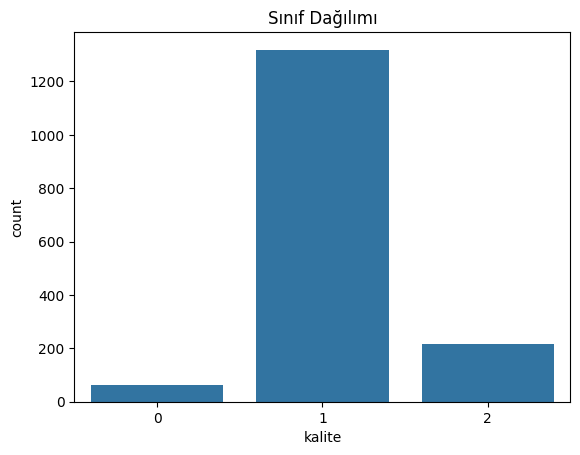

In [ ]:
print("\n Veri şekli:", X.shape)
print("Sınıf Dağılımı:")
print(pd.Series(y).value_counts())

print("\n Özelliklerin istatistiksel özeti:")
display(X.describe())

# Sınıf dağılımı
sns.countplot(x='kalite', data=df)
plt.title("Sınıf Dağılımı")
plt.show()



In [ ]:
# Hedef değerlerin dağılımını koruyarak test ve train kümelerinin oluşturulması
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop(['quality', 'kalite'], axis=1)
y = df['kalite']

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


In [ ]:
print("Eğitim seti sınıf dağılımı:")
print(y_train.value_counts(normalize=True))

print("\nTest seti sınıf dağılımı:")
print(y_test.value_counts(normalize=True))


Eğitim seti sınıf dağılımı:
kalite
1    0.824863
2    0.136044
0    0.039093
Name: proportion, dtype: float64

Test seti sınıf dağılımı:
kalite
1    0.825000
2    0.134375
0    0.040625
Name: proportion, dtype: float64


In [ ]:
#Özelliklerin normalize edilmesi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Optimizing KNN...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 85.00%
F1 Score: 0.82
              precision    recall  f1-score   support

       düşük       0.00      0.00      0.00        13
        orta       0.86      0.97      0.91       264
      yüksek       0.67      0.37      0.48        43

    accuracy                           0.85       320
   macro avg       0.51      0.45      0.46       320
weighted avg       0.80      0.85      0.82       320



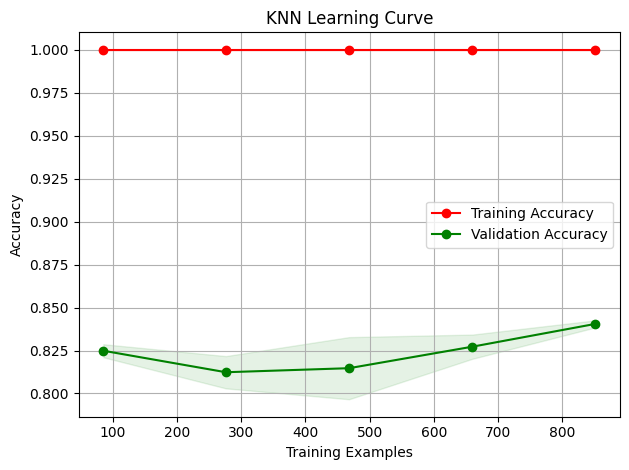

Optimizing SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 82.50%
F1 Score: 0.77
              precision    recall  f1-score   support

       düşük       0.00      0.00      0.00        13
        orta       0.83      0.98      0.90       264
      yüksek       0.50      0.09      0.16        43

    accuracy                           0.82       320
   macro avg       0.44      0.36      0.35       320
weighted avg       0.75      0.82      0.77       320



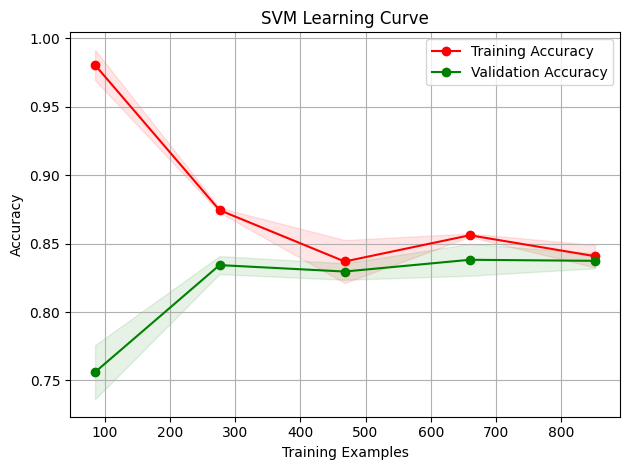

Optimizing Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 85.62%
F1 Score: 0.83
              precision    recall  f1-score   support

       düşük       0.00      0.00      0.00        13
        orta       0.88      0.96      0.92       264
      yüksek       0.67      0.47      0.55        43

    accuracy                           0.86       320
   macro avg       0.51      0.48      0.49       320
weighted avg       0.81      0.86      0.83       320



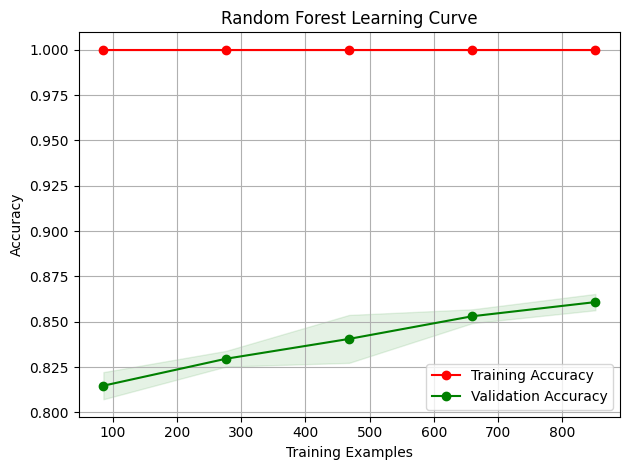

Optimizing Decision Tree...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 82.50%
F1 Score: 0.81
              precision    recall  f1-score   support

       düşük       0.00      0.00      0.00        13
        orta       0.87      0.92      0.90       264
      yüksek       0.57      0.47      0.51        43

    accuracy                           0.82       320
   macro avg       0.48      0.46      0.47       320
weighted avg       0.80      0.82      0.81       320



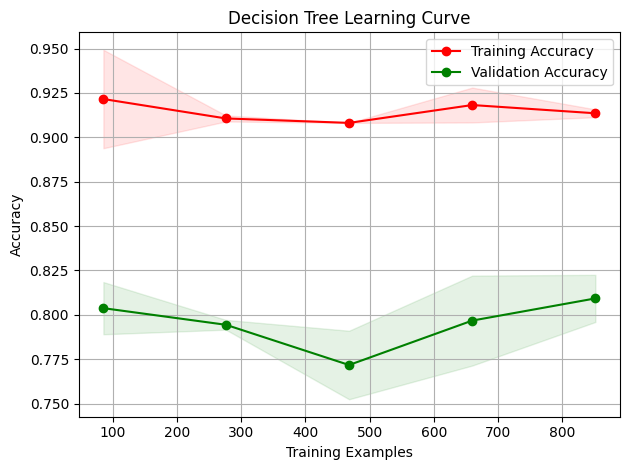

Optimizing Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression Best Parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 83.75%
F1 Score: 0.81
              precision    recall  f1-score   support

       düşük       0.00      0.00      0.00        13
        orta       0.86      0.96      0.91       264
      yüksek       0.58      0.35      0.43        43

    accuracy                           0.84       320
   macro avg       0.48      0.44      0.45       320
weighted avg       0.79      0.84      0.81       320



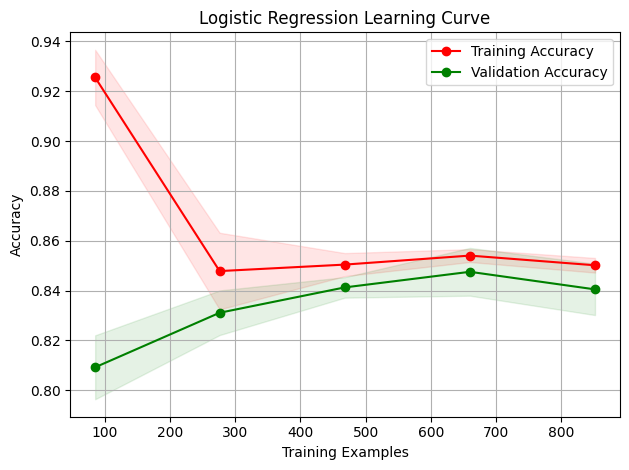

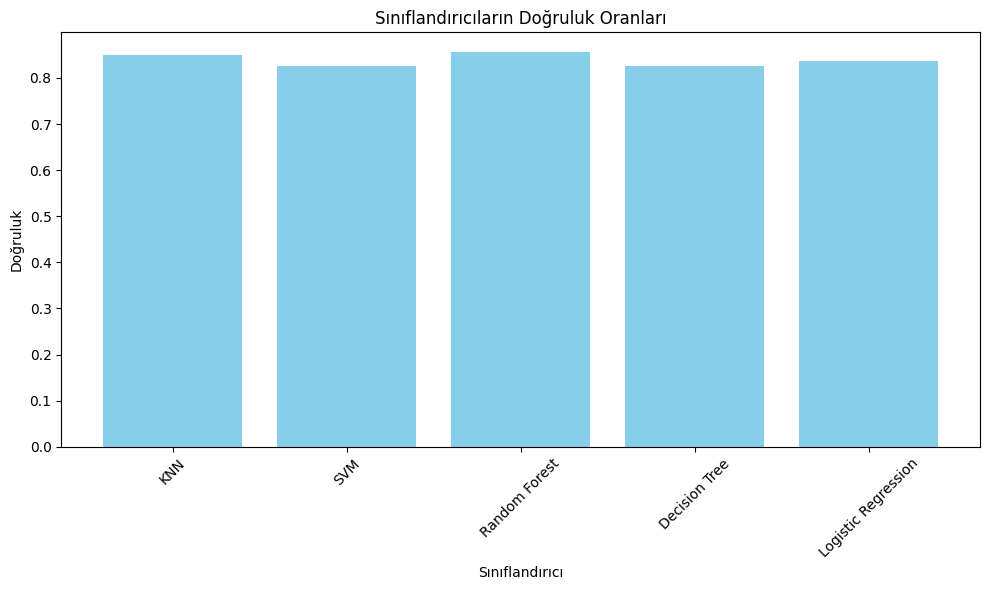

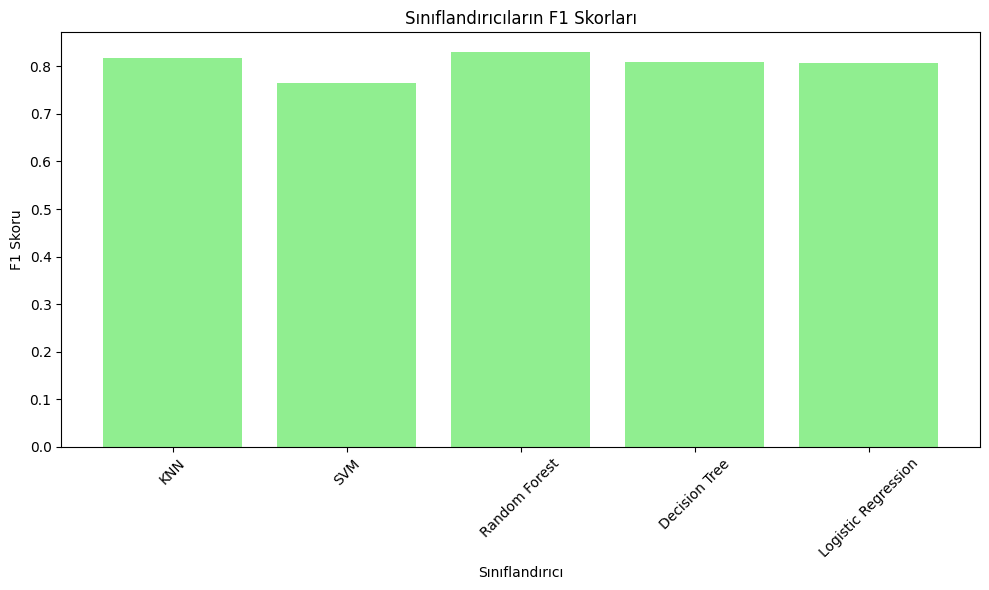

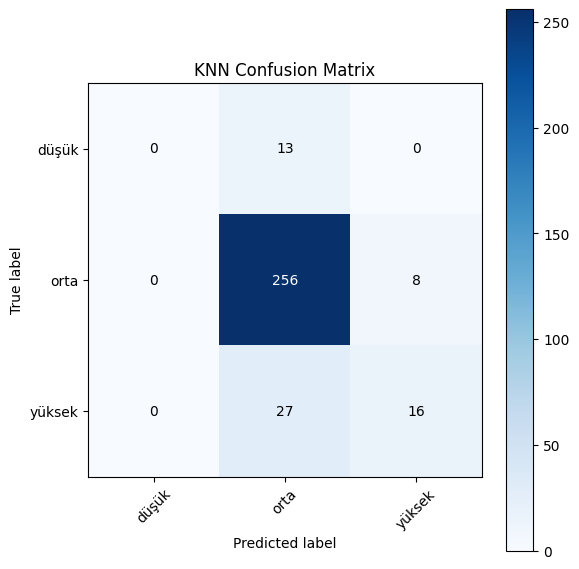

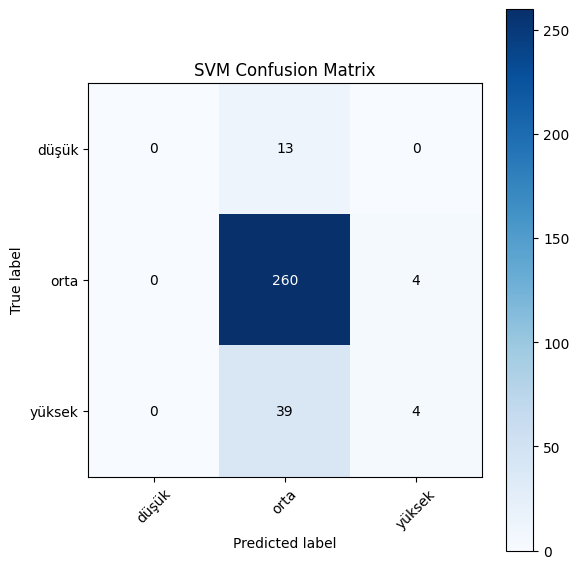

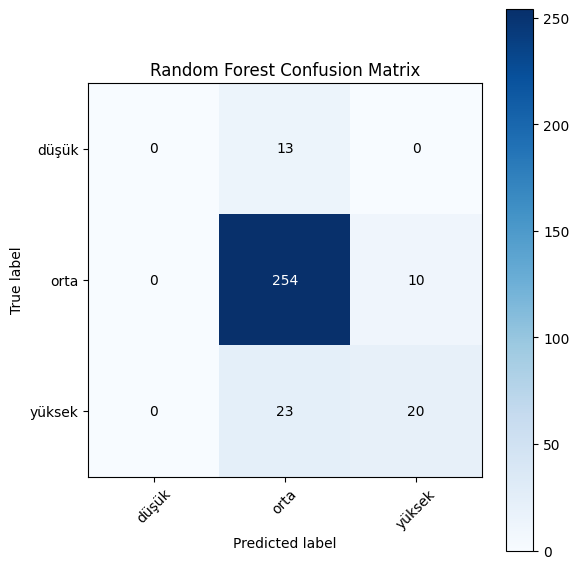

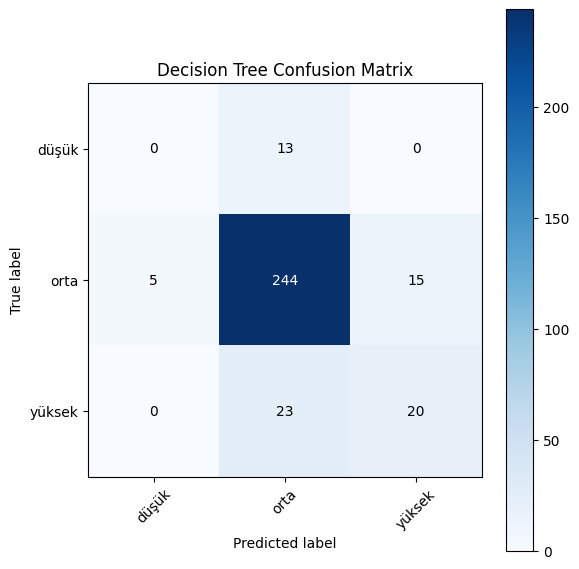

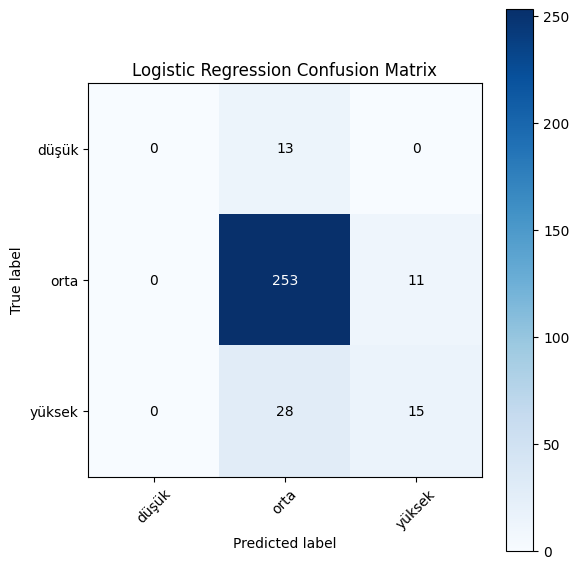

In [ ]:
param_grids = {
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    "SVM": {
        "C": [1, 10, 100],
        "gamma": ['scale', 'auto'],
        "kernel": ['rbf', 'linear']
    },
    "Random Forest": {
        "n_estimators": [50, 100, 150],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Decision Tree": {
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2, 5]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ['liblinear', 'saga']
    },
}

# Sınıflandırıcılar
classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
}

# Öğrenme eğrisi fonksiyonu
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")

    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Accuracy")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.grid()
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


results = {}
for name, clf in classifiers.items():
    print(f"Optimizing {name}...")

    grid_search = GridSearchCV(clf, param_grids[name], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Best Params": grid_search.best_params_
    }

    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred, target_names=classes))

    plot_learning_curve(best_model, f"{name} Learning Curve", X_train, y_train, cv=3, n_jobs=-1)

# Doğruluk oranları barplot
accuracies = [result["Accuracy"] for result in results.values()]
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), accuracies, color='skyblue')
plt.title('Sınıflandırıcıların Doğruluk Oranları')
plt.ylabel('Doğruluk')
plt.xlabel('Sınıflandırıcı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# F1 Skorları barplot
f1_scores = [result["F1 Score"] for result in results.values()]
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), f1_scores, color='lightgreen')
plt.title('Sınıflandırıcıların F1 Skorları')
plt.ylabel('F1 Skoru')
plt.xlabel('Sınıflandırıcı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Confusion Matrix görselleştirme + hücre sayıları
for name, result in results.items():
    cm = result["Confusion Matrix"]
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Hücrelere sayı ekle
    thresh = cm.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()